# Comparaison des pics observés à JX et JY

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import chi2_contingency


Cette fonction permet de : 
- Compter le nombre de pics et non-pics pour chaque liste et montrer le graph
- Regarder si il y a une différence significative entre les deux listes 
- Compter le nombre de Pics (1) 

In [2]:
def chi_deux_listes_pics(liste1,liste2,ones_list1, ones_list2):
    contingency_table=[[len(liste1), len(liste2)],[ones_list1, ones_list2]]
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print(" Il y a une différence significative entre les deux listes")
    else: 
        print("Il n'y a pas de différence significative entre les deux listes")

In [59]:
def repartition_pics_communs(liste1,liste2):
    data = np.zeros((3,max(len(liste1), len(liste2))))
    cmap = mpl.colors.ListedColormap(["red","green"])
    label = ["Liste1", "Liste2", "Comparaison"]

    for i in range(len(liste1)):
        data[0][i] = liste1[i]

    for i in range(len(liste2)):
        data[1][i] = liste2[i]

    for i in range(len(liste1)):
        if liste1[i] == liste2[i]:
            data[2][i] = 1

    plt.imshow(data, cmap=cmap, interpolation='none')
    plt.xlabel("Numéro de pic")
    plt.ylabel("Liste")
    plt.yticks(range(data.shape[0]), ["Liste 1", "Liste 2", "Comparaison"])
    cbar = plt.colorbar(ticks=[0,1])
    cbar.ax.set_aspect(7)
    cbar.outline.set_visible(False)
    cbar.ax.set_yticklabels([" Non-Pic/ Pic non-commun ", " Pic/ Pic Commun"])
    plt.show()

In [60]:
def comparaisons_pics(liste1, liste2):

    ones_list1 = liste1.count(1)
    zeros_list1 = liste1.count(0)
    ones_list2 = liste2.count(1)
    zeros_list2 = liste2.count(0)

  # Distribution des 1 et des 0 
    fig, ax = plt.subplots(1, 2)
    ax[0].pie([ones_list1, zeros_list1 ], labels=['Pic', 'Pas pic'], autopct='%1.2f%%',shadow=True)
    ax[0].set_title('liste1')
    ax[1].pie([ones_list2, zeros_list2], labels=['Pic', 'Pas pic'], autopct='%1.2f%%',shadow=True)
    ax[1].set_title('liste2')
    plt.show()

  # Différence significative entre les deux listes 
    chi_deux_listes_pics(liste1,liste2,ones_list1, ones_list2)

  # Nombre de pics à la même position entre les deux listes 
    common_ones = 0
    for i in range(len(liste1)):
        if liste1[i] == liste2[i] and liste1[i] == 1:
            common_ones += 1
    print("Le nombre de pics (1) à la même position est :", common_ones)
  
  # Répartition des pics communs et pas communs aux deux listes 
    repartition_pics_communs(liste1,liste2)

# TEST 

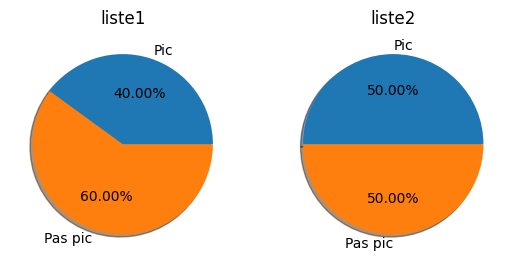

Il n'y a pas de différence significative entre les deux listes
Le nombre de pics (1) à la même position est : 4


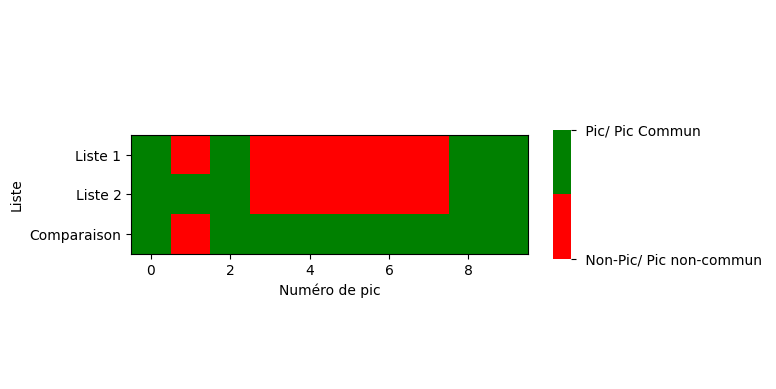

In [61]:

liste1 = [1,0,1,0,0,0,0,0,1,1]
liste2 = [1,1,1,0,0,0,0,0,1,1]

comparaisons_pics(liste1, liste2)